In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('starbucks.csv', index_col= 'Date', parse_dates=True)

In [8]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


<Axes: xlabel='Date'>

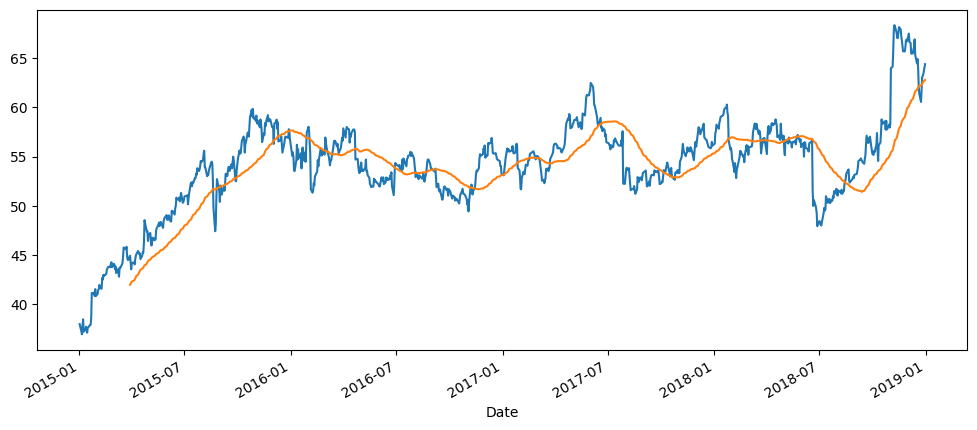

In [19]:
df['Close'].plot(figsize=(12,5))
df.rolling(window = 60 ).mean(())['Close'].plot(figsize=(12,5))

<Axes: xlabel='Date'>

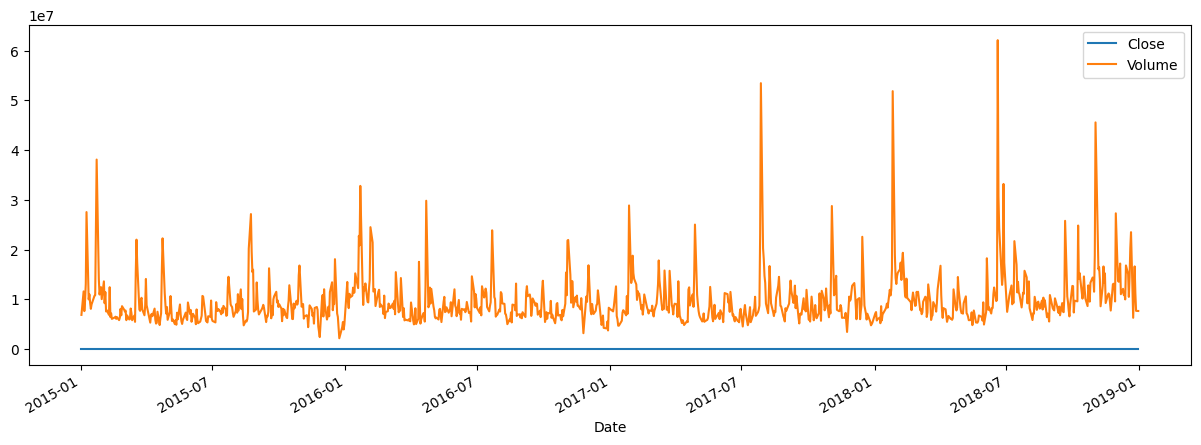

In [23]:
df.plot(figsize=(15,5))

[Text(0.5, 0, '')]

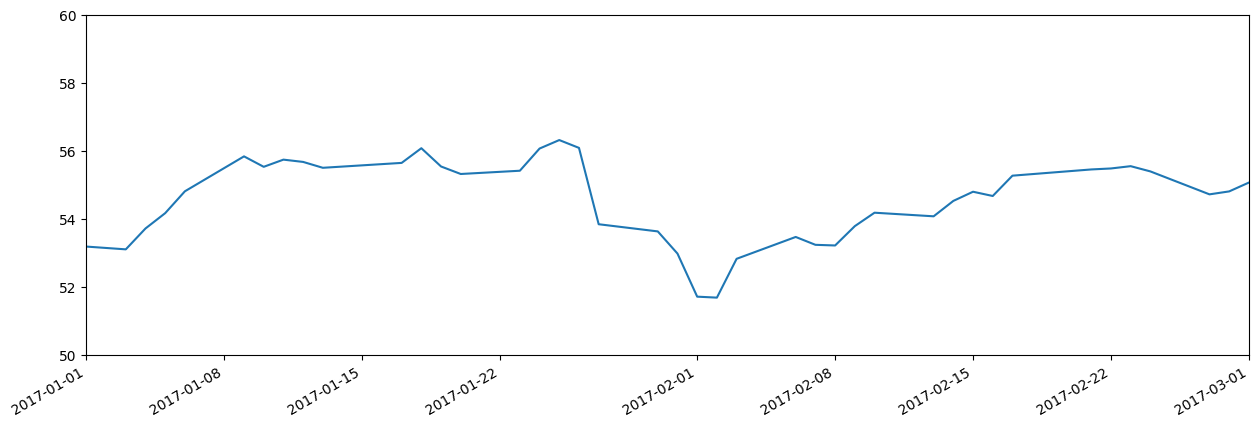

In [28]:
df['Close'].plot(figsize= (15,5),xlim=['2017-01-01','2017-03-01'],ylim=[50,60]).set(xlabel = '')

In [31]:
df = pd.read_csv('UDEMY_TSA_FINAL\Data\macrodata.csv')

In [32]:
df.head()

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

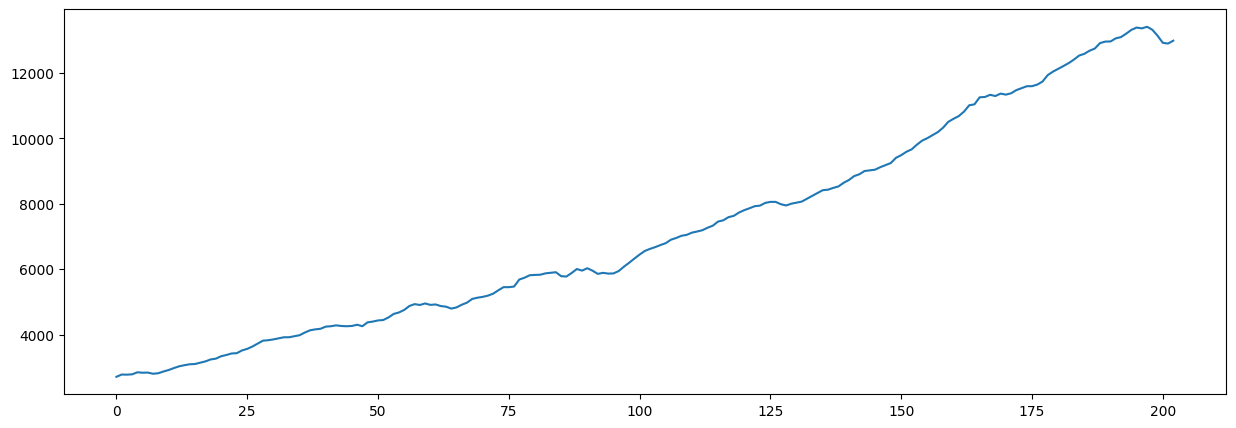

In [33]:
df['realgdp'].plot(figsize=(15,5))

In [35]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [36]:
gdp_cycle , gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [40]:
gdp_cycle

0       39.511915
1       80.088532
2       48.875455
3       30.591933
4       64.882667
          ...    
198    102.018455
199   -107.269472
200   -349.047706
201   -397.557073
202   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

<Axes: >

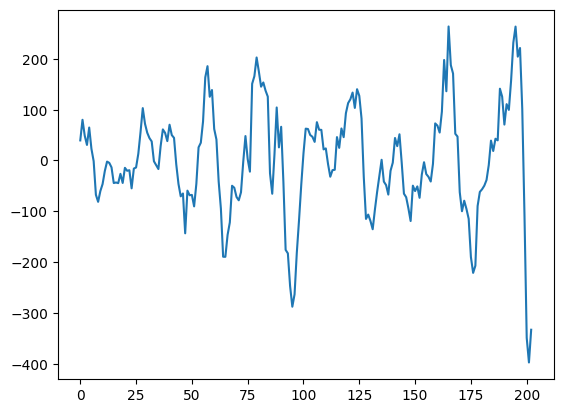

In [41]:
gdp_cycle.plot()

In [52]:
df = pd.read_csv('UDEMY_TSA_FINAL\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)

In [53]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [54]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

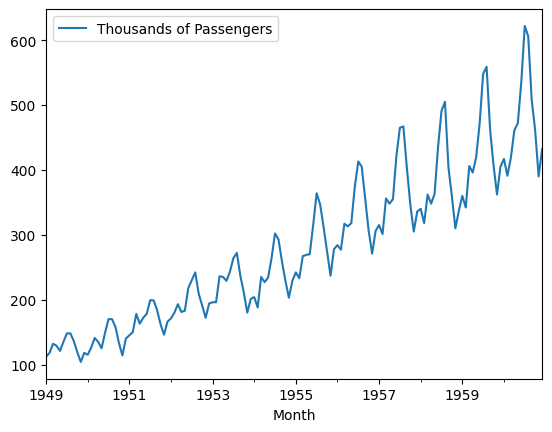

In [55]:
df.plot()

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
result = seasonal_decompose(df['Thousands of Passengers'],model = 'multiplicative')

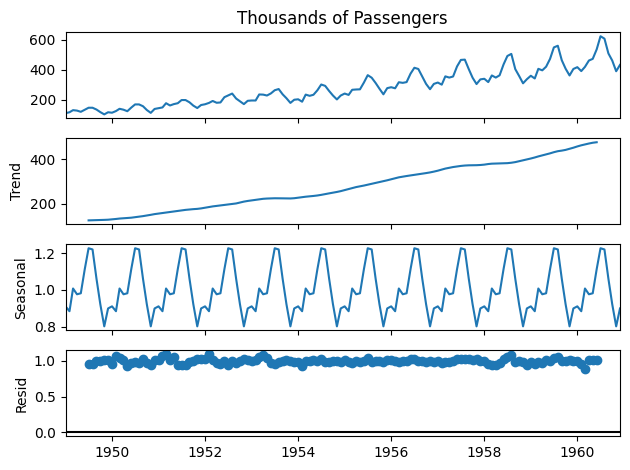

In [67]:
result.plot();

In [68]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [21]:
import matplotlib as plt
%matplotlib inline

## EWMA Coding 43

In [4]:
df = pd.read_csv('UDEMY_TSA_FINAL\Data\\airline_passengers.csv', index_col = 'Month')

In [14]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.dropna(inplace = True)

In [10]:
df.index = pd.to_datetime(df.index)

In [13]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Creating a simple moving avrage (SMA) by using the function .rolling()

In [25]:
df['6-Month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-Month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

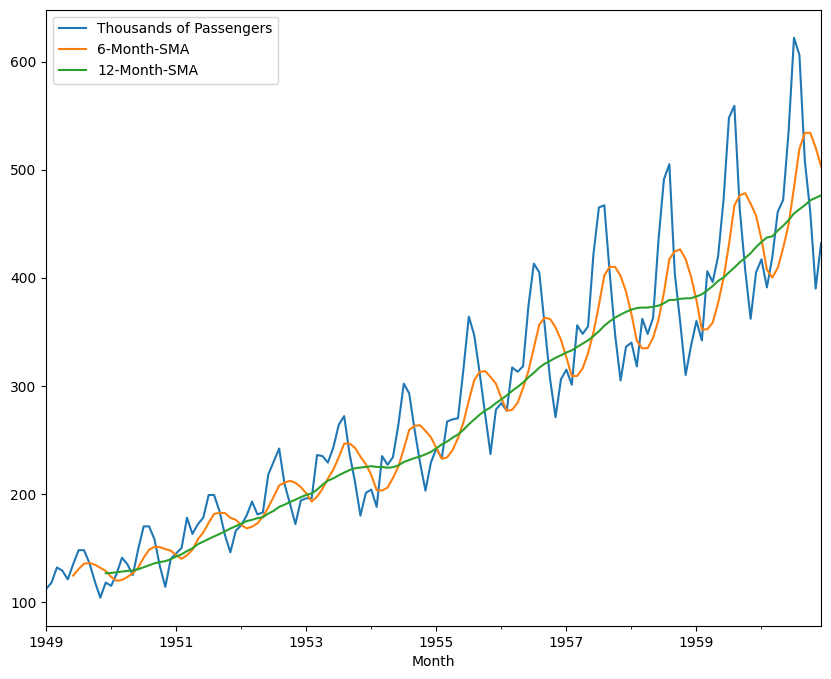

In [28]:
df.plot(figsize= (10,8))

In [49]:
df['EWMA'] = df['Thousands of Passengers'].ewm(span = 3).mean()

<Axes: xlabel='Month'>

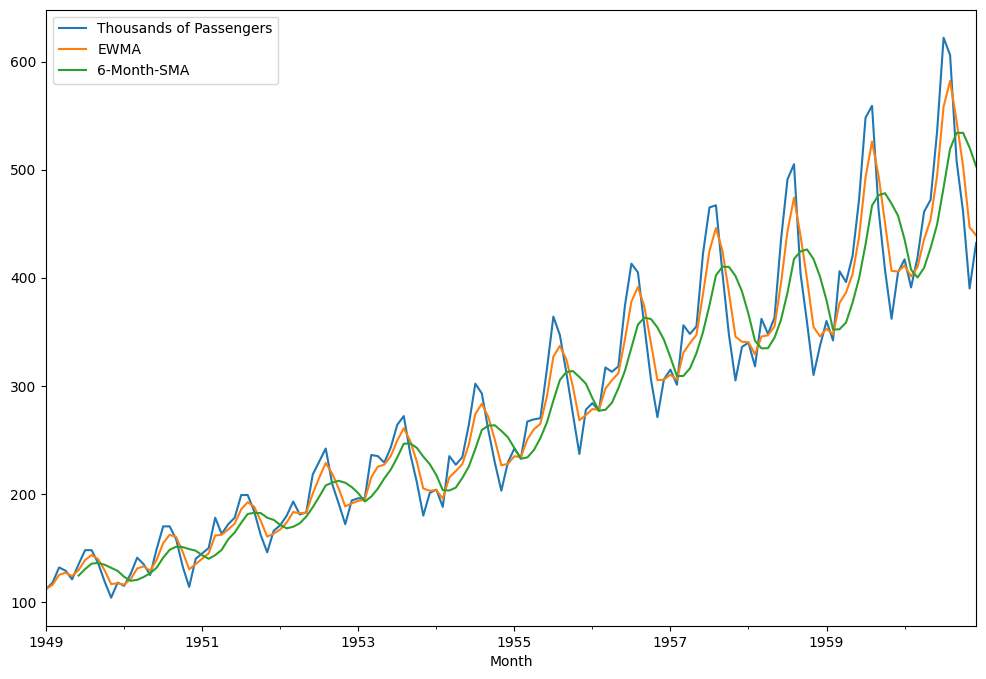

In [50]:
df[['Thousands of Passengers','EWMA','6-Month-SMA']].plot(figsize= (12,8))

## Holt-Winter Coding session 45-46

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [58]:
span = 12
alpha = 2/(span+1)

In [57]:
df.index.freq = 'MS'

In [62]:
df['EWMA'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [63]:
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


In [64]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [66]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [72]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [78]:
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


The thing has done above the first level of holt-winter method and we showed that it is basicly the same thing as doin the EWMA by turning of the adjusting

<Axes: xlabel='Month'>

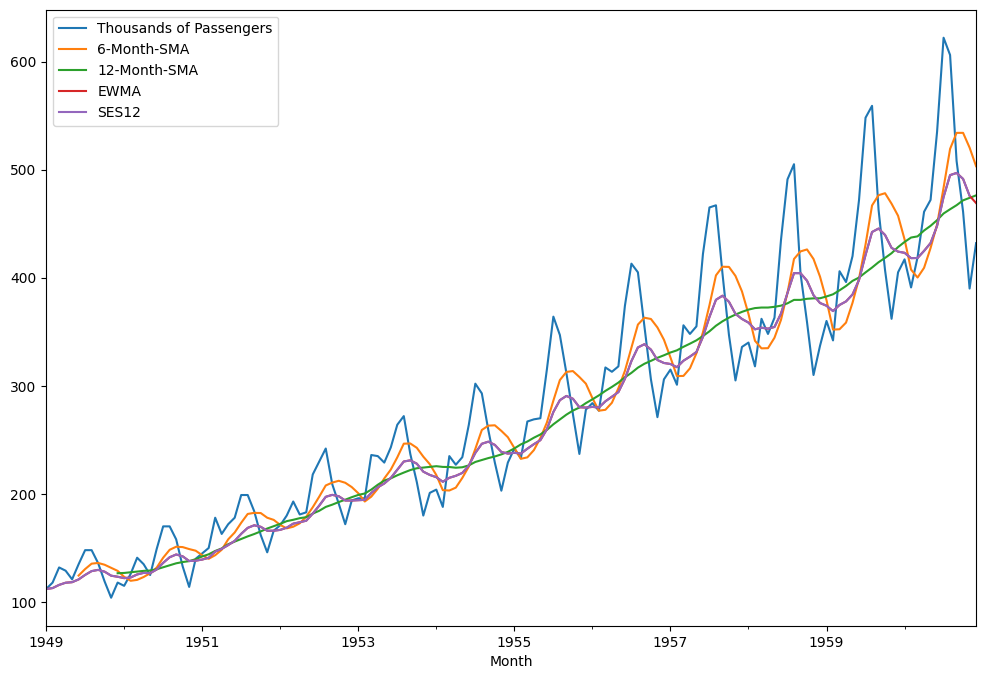

In [79]:
df.plot(figsize=(12,8))

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [87]:
df = df.drop(['6-Month-SMA','12-Month-SMA'],axis=1)

<Axes: xlabel='Month'>

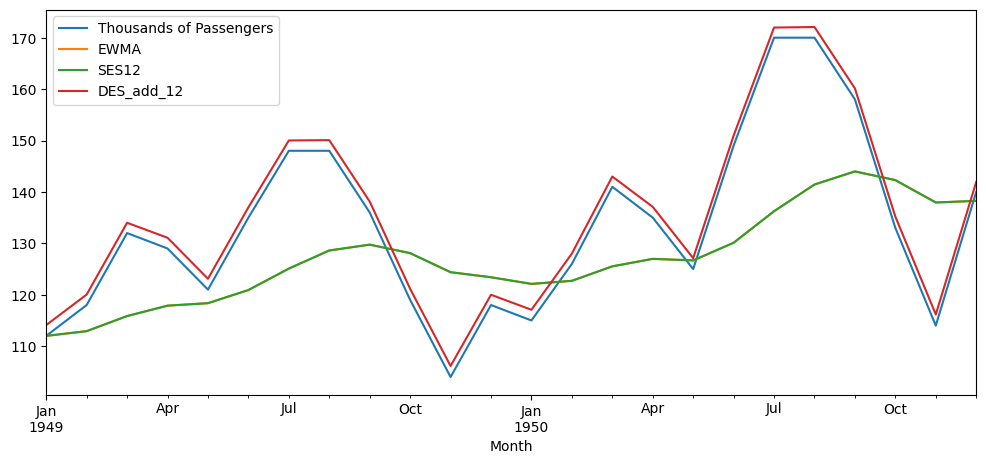

In [90]:
df.iloc[:24].plot(figsize=(12,5))

In [91]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

<Axes: xlabel='Month'>

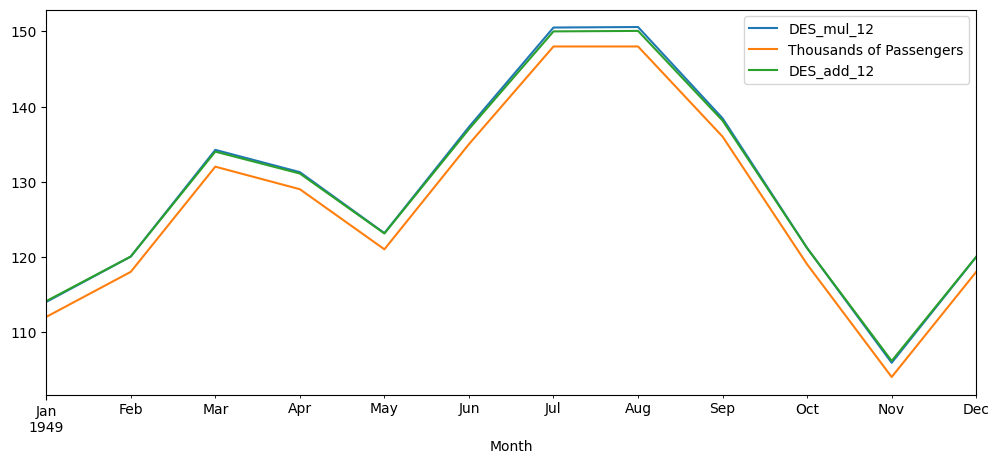

In [97]:
df[['DES_mul_12','Thousands of Passengers','DES_add_12']].iloc[:12].plot(figsize=(12,5))

In [102]:
df['DES_mul_12_seas'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [103]:
df.head()

,Thousands of Passengers,EWMA,SES12,DES_add_12,DES_mul_12,DES_mul_12_seas
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.979016


<Axes: xlabel='Month'>

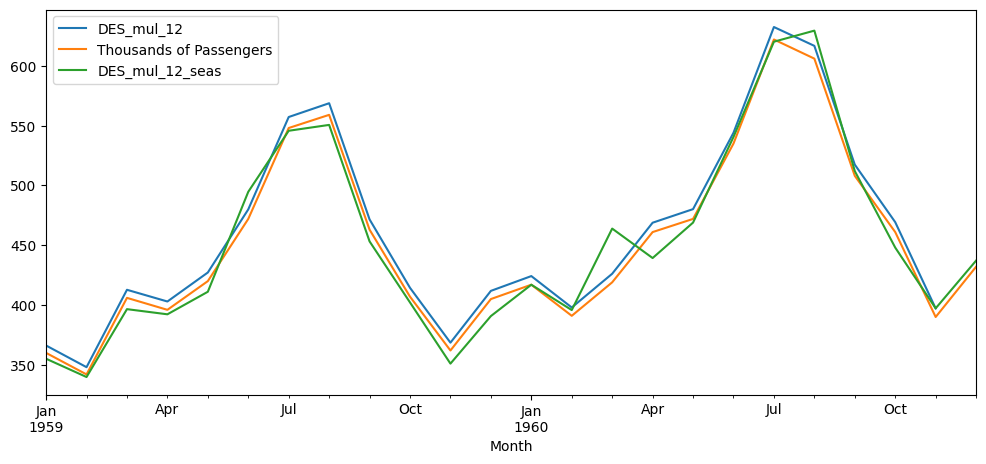

In [109]:
df[['DES_mul_12','Thousands of Passengers','DES_mul_12_seas']].iloc[-24:].plot(figsize=(12,5))